In [1]:
#====================================
# CNN Lecture Part 1
# Joshuah Touyz
#====================================

In [2]:
# ======================
#  Importing Librarires
# ======================
import tensorflow as tf
import keras
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

# For reproducibility
np.random.seed(123) 

/home/joshuah/venv3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/joshuah/venv3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/joshuah/venv3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# ===========================================
#  Importing model and core layers in Keras
# ==========================================
# Importing the sequential model in Keras
# Used as a linear stack of nn layers
from keras.models import Sequential

# Importing core neural networks layers 
from keras.layers import Dense, Dropout, Activation, Flatten

# Importing CNN layers
from keras.layers import Conv2D, MaxPooling2D

# Tools for data transformation
from keras.utils import np_utils

In [4]:
# =============================
#  Importing images from MNIST
# =============================
from keras.datasets import mnist


(60000, 28, 28)


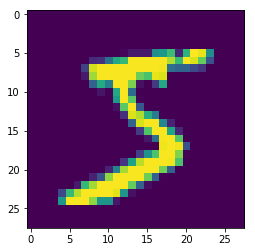

In [5]:
 # Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Shape check and plotting
print(X_train.shape)
plt.imshow(X_train[0])

In [6]:
# ========================
#  Data Munging/Reshaping
# ========================
# Declaring a depth of 1 for MNIST
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# Setting up calues as float32s that are bounded between 0 and 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Processing class labels they are currently a numeric vector
# ----> we need to transform them into categories
print(y_train.shape)
print(y_train[:10])

# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
# Check the shape
print(Y_train.shape)

(60000,)
[5 0 4 1 9 2 1 3 1 4]
(60000, 10)


In [29]:
# =============================
#  Setting up the Architecture
# ============================
# Declaring sequential model
model = Sequential()
# CNN input layer: input_shape: (depth,width,height)
# CNN convolution: number of filters, height and width of kernel
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
# Notice here the the first entry output is none
print(model.output_shape)

# Next we add the remaining layers
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Setting up the fully connected lauer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.summary())

(None, 26, 26, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                294976    
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0 

In [30]:
# =========================================
# Multigpu support Function Make-Parallel
# ========================================
# MultiGPU hack: 
# https://github.com/rossumai/keras-multi-gpu/tree/master/keras_tf_multigpu

# =====================
#  Compiling the model
# =====================
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# ===================
# Fitting the model
# ===================
model.fit(X_train, Y_train,
          epochs=10,
          batch_size=128,
         verbose = 0)
# =====================
#  Evaluating the model
# =====================
score = model.evaluate(X_test, Y_test, verbose=1)


10000/10000 [==============================] - 1s 74us/step


In [18]:
predicted_values = model.predict_classes(X_test[0:2**9],batch_size=32, verbose=1)
pd.crosstab(predicted_values, y_test[0:2**9],
            rownames=['Predicted Value'], colnames= ['True Value'] )

512/512 [==============================] - 0s 72us/step


True Value,0,1,2,3,4,5,6,7,8,9
Predicted Value,,,,,,,,,,
0,42,0,0,0,0,0,1,0,0,0
1,0,69,0,0,0,0,0,0,0,0
2,0,0,56,0,0,0,0,0,0,0
3,0,0,0,48,0,0,0,0,0,0
4,0,0,0,0,56,0,0,0,0,1
5,0,0,0,0,0,52,0,0,0,0
6,0,0,0,0,0,0,43,0,0,0
7,0,0,0,0,0,0,0,50,0,0
8,0,0,0,0,0,0,0,0,40,1


In [22]:
###########################
# Coparing to a base model
###########################
# How does our CNN compare to a dense network?
# Declaring sequential model

model_dense = Sequential()
model_dense.add(Dense(32, activation = "relu", input_shape=(28,28,1)))
model_dense.add(Dense(32, activation = "relu"))
model_dense.add(Dropout(0.5))
model_dense.add(Flatten())
model_dense.add(Dense(10, activation='softmax'))
print(model_dense.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 28, 28, 32)        64        
_________________________________________________________________
dense_16 (Dense)             (None, 28, 28, 32)        1056      
_________________________________________________________________
dropout_9 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                250890    
Total params: 252,010
Trainable params: 252,010
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
#  Compiling the model
model_dense.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])
# Fitting the model
model_dense.fit(X_train, Y_train,epochs=10,batch_size=128,verbose = 1)
#  Evaluating the model
score_dense = model_dense.evaluate(X_test, Y_test, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.4205 - acc: 0.8835
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.2980 - acc: 0.9147
Epoch 3/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.2872 - acc: 0.9181
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.2782 - acc: 0.9203
Epoch 5/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.2707 - acc: 0.9238
Epoch 6/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.2642 - acc: 0.9249
Epoch 7/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.2605 - acc: 0.9263
Epoch 8/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2559 - acc: 0.9277
Epoch 9/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.2551 - acc: 0.9275
Epoch 10/10
10000/10000 [==============================] - 1s 77us/step


In [28]:
print("""
Scores CNN network (crossentropy, accuracy): {}""".format(np.round(score,3)))
print("""----
Scores dense network (crossentropy, accuracy): {}
""".format(np.round(score_dense,3)))


Scores CNN network (crossentropy, accuracy): [0.034 0.99 ]
----
Scores dense network (crossentropy, accuracy): [0.251 0.93 ]

